   iter      a         b       mid    f(mid)  derivative
0     0 -5.000  6.000000  0.500000  5.250000   -3.000000
1     1  0.500  6.000000  3.250000  4.562500    2.500000
2     2  0.500  3.250000  1.875000  3.015625   -0.250000
3     3  1.875  3.250000  2.562500  3.316406    1.125000
4     4  1.875  2.562500  2.218750  3.047852    0.437500
5     5  1.875  2.218750  2.046875  3.002197    0.093750
6     6  1.875  2.046875  1.960938  3.001526   -0.078125


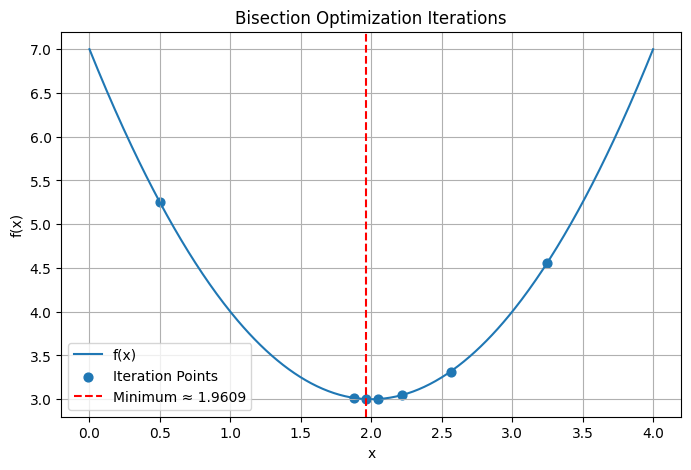

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bisection_minimize(f, a, b, tol=1e-5, max_iter=7):
    """
    Bisection method for finding the minimum of a unimodal function f on [a, b].
    Uses derivative sign approximation.
    """
    iterations = []
    
    for k in range(max_iter):
        mid = (a + b) / 2

        # Approximate derivative using symmetric difference
        h = 1e-6
        derivative = (f(mid + h) - f(mid - h)) / (2*h)

        # Store iteration
        iterations.append({
            "iter": k,
            "a": a,
            "b": b,
            "mid": mid,
            "f(mid)": f(mid),
            "derivative": derivative
        })

        # Bisection update rule based on derivative sign
        if abs(derivative) < tol:
            break

        if derivative > 0:
            b = mid
        else:
            a = mid

        # Check interval length
        if abs(b - a) < tol:
            break

    return mid, pd.DataFrame(iterations)


# -----------------------------
# Example usage
# -----------------------------

# Define your function here
def f(x):
    return (x - 2)**2 + 3   # simple quadratic with min at x=2

# Run minimization
xmin, table = bisection_minimize(f, a=-5, b=6)

# Print iteration table
print(table)

# Plot function and iteration points
x_vals = np.linspace(-0, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x)")
plt.scatter(table["mid"], table["f(mid)"], s=40, label="Iteration Points")
plt.axvline(x=xmin, color="r", linestyle="--", label=f"Minimum ≈ {xmin:.4f}")
plt.title("Bisection Optimization Iterations")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


Estimated minimum x = 2.9179606750063085, f(x) = 2.0067304508454207

Iteration table (last 10 rows):
 iter         a        b  interval_len        c        d     f(c)      f(d)
    1 -5.000000 10.00000     15.000000 0.729490 4.270510 7.155215  3.614195
    2  0.729490 10.00000      9.270510 4.270510 6.458980 3.614195 13.964545
    3  0.729490  6.45898      5.729490 2.917961 4.270510 2.006730  3.614195
    4  0.729490  4.27051      3.541020 2.082039 2.917961 2.842652  2.006730
    5  2.082039  4.27051      2.188471 2.917961 3.434588 2.006730  2.188867


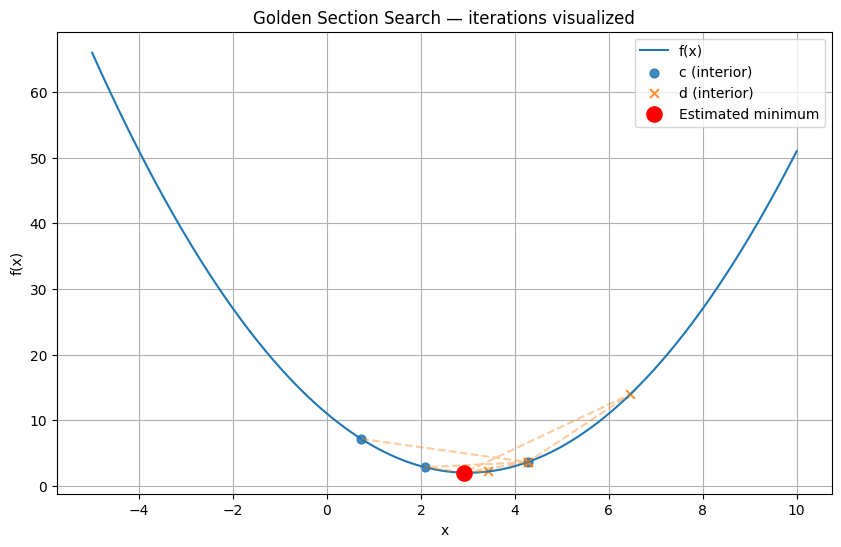

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def golden_section_search(f, a, b, tol=1e-6, max_iter=100):
    """
    Perform Golden Section Search to find the minimum of a 1D function f on [a, b].

    Returns:
      x_best: x-value of best found minimum
      f_best: f(x_best)
      history: pandas DataFrame with iteration details
    """
    # golden ratio constant (gr ≈ 0.618...)
    gr = (np.sqrt(5) - 1) / 2

    # initial interior points
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    fc = f(c)
    fd = f(d)

    rows = []
    for i in range(1, max_iter + 1):
        rows.append({
            "iter": i,
            "a": a,
            "b": b,
            "interval_len": b - a,
            "c": c,
            "d": d,
            "f(c)": fc,
            "f(d)": fd
        })

        # stopping condition
        if (b - a) < tol:
            break

        # choose the subinterval that contains the minimum
        if fc < fd:
            # minimum is in [a, d]
            b = d
            # move d to c, then compute new c
            d = c
            fd = fc
            c = b - gr * (b - a)
            fc = f(c)
        else:
            # minimum is in [c, b]
            a = c
            # move c to d, then compute new d
            c = d
            fc = fd
            d = a + gr * (b - a)
            fd = f(d)

    # pick the best among the evaluated points and endpoints
    candidates = {
        a: f(a),
        b: f(b),
        c: fc,
        d: fd
    }
    x_best = min(candidates, key=candidates.get)
    f_best = candidates[x_best]

    history = pd.DataFrame(rows, columns=["iter", "a", "b", "interval_len", "c", "d", "f(c)", "f(d)"])
    return x_best, f_best, history

# ---------------------------
# Example usage & visualization
# ---------------------------

if __name__ == "__main__":
    # Test function: minimum at x = 3
    def f(x):
        return (x - 3)**2 + 2

    # Run search
    a0, b0 = -5.0, 10.0
    x_min, f_min, table = golden_section_search(f, a0, b0, tol=1e-8, max_iter=5)

    # Print results
    print(f"Estimated minimum x = {x_min}, f(x) = {f_min}")
    print("\nIteration table (last 10 rows):")
    print(table.tail(10).to_string(index=False))

    # Plot function and iteration points
    xs = np.linspace(a0, b0, 800)
    ys = f(xs)

    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, label="f(x)", linewidth=1.5)

    # Plot c and d points from history
    plt.scatter(table["c"], table["f(c)"], marker='o', label="c (interior)", s=40, alpha=0.85)
    plt.scatter(table["d"], table["f(d)"], marker='x', label="d (interior)", s=40, alpha=0.85)

    # Connect iteration points with faint line to show progression (optional)
    # We'll plot the sequence of chosen interior points by iteration (interleave c,d)
    seq_x = []
    seq_y = []
    for _, row in table.iterrows():
        seq_x.append(row["c"]); seq_y.append(row["f(c)"])
        seq_x.append(row["d"]); seq_y.append(row["f(d)"])
    plt.plot(seq_x, seq_y, linestyle='--', alpha=0.4)

    # Highlight best point
    plt.scatter([x_min], [f_min], color='red', s=120, label="Estimated minimum", zorder=5)
    plt.title("Golden Section Search — iterations visualized")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


   Iteration         x         y    f(x,y)  |fk - fk-1|
0        0.0  1.500000  0.500000  4.934351     0.028395
1        1.0  0.624720  1.165504  4.905957     1.941525
2        2.0 -0.022409  0.598473  2.964432     0.810767
3        3.0 -0.150650  0.109123  2.153665     0.432282
4        4.0 -0.082210 -0.512321  1.721383     0.143755
5        5.0  0.268582 -0.662316  1.577628     0.008577
6        6.0  0.379564 -0.738632  1.569051     0.000055

Minimum found at: (0.37956350692393453, -0.7386317415871558)


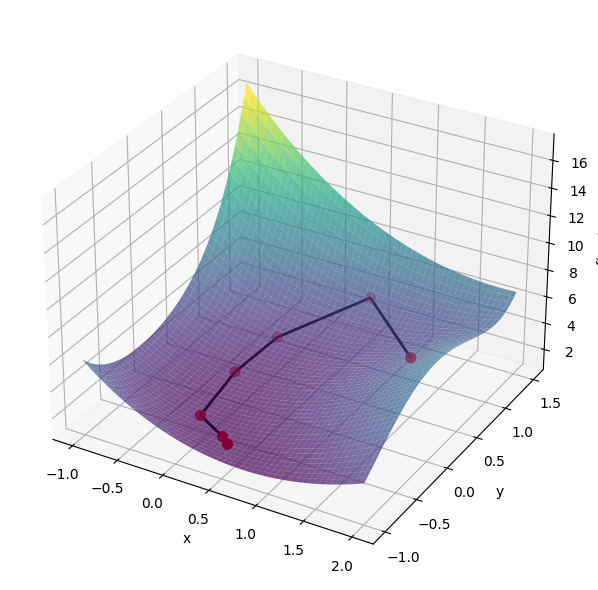

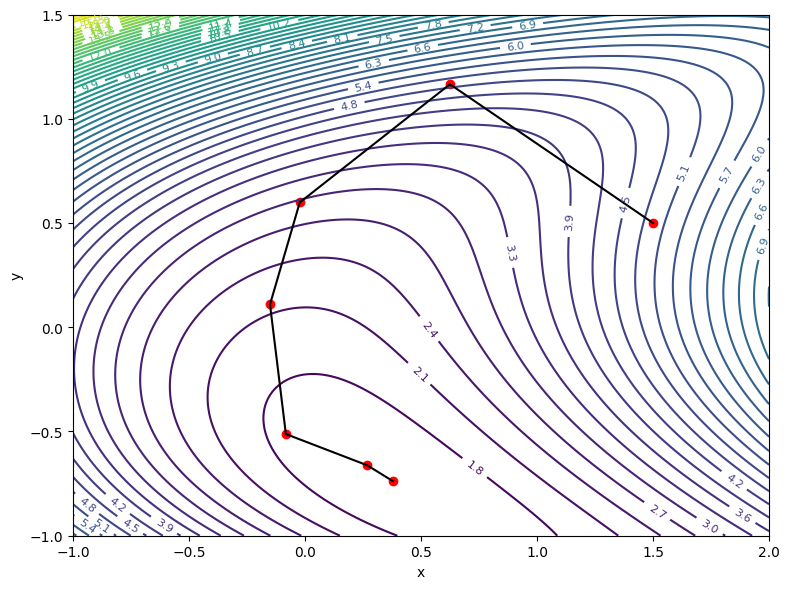

In [3]:
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.use("pgf")

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
#newton's method

#parametry
pocatecni_bod =  (1.5, 0.5)
graf_interval_x = (-1, 2)
graf_interval_y = (-1, 1.5)


def f(x, y):
    return np.exp(-x) + np.exp(y) + (x - y*y)**2 + x


def grad_f(x, y):
    df_dx = -np.exp(-x) + 2 * (x - y**2) + 1
    df_dy =  np.exp(y) - 4 * y * (x - y**2)
    return np.array([df_dx, df_dy])


def hessian_f(x, y):
    d2f_dx2 = np.exp(-x) + 2
    d2f_dy2 = np.exp(y) - 4 * x + 12 * y**2
    d2f_dxdy = -4 * y

    return np.array([
        [d2f_dx2, d2f_dxdy],
        [d2f_dxdy, d2f_dy2]
    ])


def newton_method(x0, y0, tol=1e-3, max_iter=20):
    x, y = x0, y0
    history = []

    for i in range(max_iter):
        g = grad_f(x, y)
        H = hessian_f(x, y)

        # Newton step
        step = np.linalg.solve(H, g)
        x_new = x - step[0]
        y_new = y - step[1]

        history.append([i, x, y, f(x, y), np.abs(f(x,y) - f(x_new, y_new))])
        
        if np.abs(f(x,y) - f(x_new, y_new)) < tol:#np.linalg.norm(g) < tol:#
            break
        
        x, y = x_new, y_new

    return np.array(history), (x, y)

history, minimum = newton_method(x0=pocatecni_bod[0], y0=pocatecni_bod[1])

df = pd.DataFrame(history, columns=["Iteration", "x", "y", "f(x,y)", "|fk - fk-1|"])
print(df)
print("\nMinimum found at:", minimum)


x_vals = np.linspace(graf_interval_x[0], graf_interval_x[1], 200)
y_vals = np.linspace(graf_interval_y[0], graf_interval_y[1], 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)


xs = df["x"].values
ys = df["y"].values
zs = df["f(x,y)"].values



# --- 3D Surface Plot ---
fig_surface = plt.figure(figsize=(8, 6))
ax1 = fig_surface.add_subplot(111, projection="3d")

ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0, antialiased=True)
ax1.scatter(xs, ys, zs, color='red', s=50)
ax1.plot(xs, ys, zs, color='black', linewidth=2)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x,y)")

plt.tight_layout()
plt.savefig("newton_surface.pgf")
plt.show()


# --- Contour Plot ---
fig_contour = plt.figure(figsize=(8, 6))
ax2 = fig_contour.add_subplot(111)

contours = ax2.contour(X, Y, Z, levels=50)
ax2.clabel(contours, inline=True, fontsize=8)

ax2.scatter(xs, ys, color='red')
ax2.plot(xs, ys, color='black')

ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.savefig("newton_contour.pgf")
plt.show()


    Iteration         x         y    f(x,y)   grad(f)
0           0  1.500000  0.500000  4.934351       NaN
1           1 -0.138435  0.925639  4.524030  3.385639
2           2  0.396305 -0.626467  1.603598  6.566560
3           3  0.317646 -0.777188  1.587214  0.638909
4           4  0.392799 -0.669545  1.582984  0.525130
5           5  0.372702 -0.755349  1.570564  0.421591
6           6  0.393845 -0.723365  1.570168  0.153364
7           7  0.387171 -0.743201  1.569018  0.129225
8           8  0.389503 -0.739339  1.569012  0.018045
9           9  0.387814 -0.741050  1.568997  0.015270
10         10  0.388119 -0.740641  1.568997  0.002043
11         11  0.388183 -0.740998  1.568996  0.001725


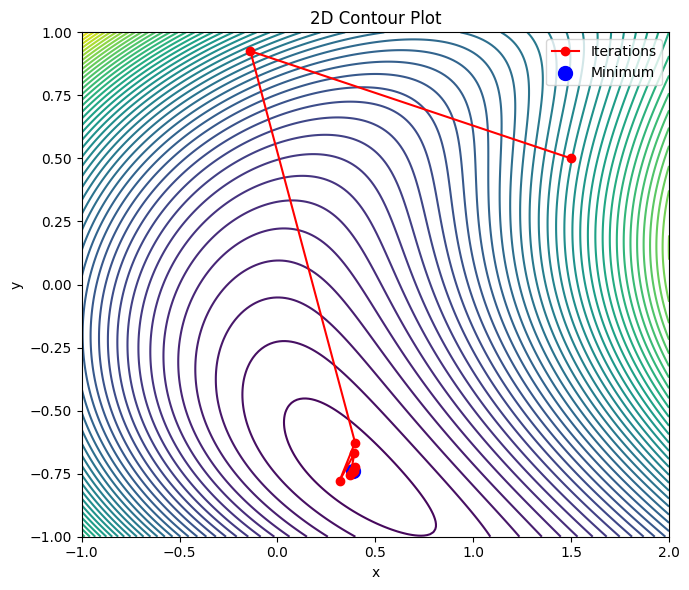

<Figure size 640x480 with 0 Axes>

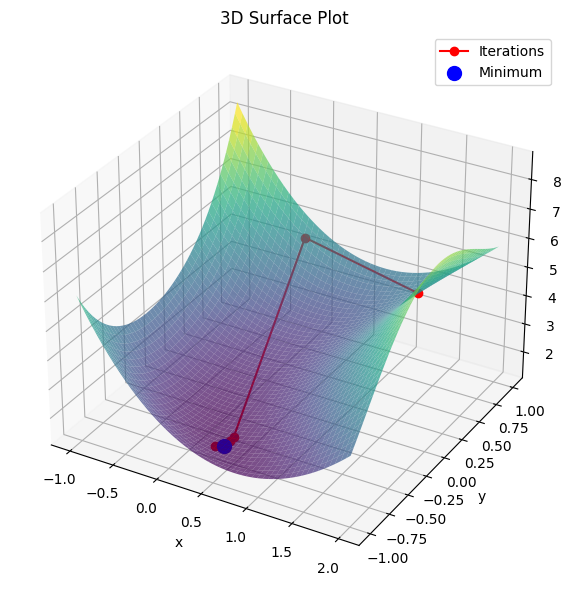

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting


pocatecni_bod = (1.5, 0.5)
graf_interval_x = (-1, 2)
graf_interval_y = (-1, 1)


# ----------------------------
# Conjugate Gradient with Reset
# ----------------------------
def conjugate_gradient_reset(f, grad_f, x0, max_iter=50, tol=1e-3):
    x = np.array(x0, dtype=float)
    g = grad_f(x[0], x[1])
    d = -g
    reset_interval = len(x)  # reset every n iterations
    history = []
    history.append({'Iteration': 0, 'x': x[0], 'y': x[1], 'f(x,y)': f(x[0], x[1])})

    for k in range(max_iter):

        # Line search (simple backtracking)
        alpha = 1.0
        c = 1e-4
        rho = 0.5
        while f(x[0] + alpha * d[0], x[1] + alpha * d[1]) > f(x[0], x[1]) + c * alpha * np.dot(g, d):
            alpha *= rho

        # Update
        x_new = x + alpha * d
        g_new = grad_f(x_new[0], x_new[1])
        beta = np.dot(g_new, g_new) / np.dot(g, g) if (k % reset_interval != 0) else 0.0
        d = -g_new + beta * d

        # Save iteration
        history.append({'Iteration': k+1, 'x': x_new[0], 'y': x_new[1], 'f(x,y)': f(x_new[0], x_new[1]), 'grad(f)': np.linalg.norm(g)})

        x, g = x_new, g_new

        if np.linalg.norm(g) < tol:
            break
    return x, history

# ----------------------------
# Example 2D Function
# ----------------------------
def f(x, y):
    return np.exp(-x) + np.exp(y) + (x - y*y)**2 + x


def grad_f(x, y):
    df_dx = -np.exp(-x) + 2 * (x - y**2) + 1
    df_dy =  np.exp(y) - 4 * y * (x - y**2)
    return np.array([df_dx, df_dy])


# ----------------------------
# Run Optimization
# ----------------------------

x_min, history = conjugate_gradient_reset(f, grad_f, pocatecni_bod)

# ----------------------------
# Display Table
# ----------------------------
df = pd.DataFrame(history)
print(df)

# ----------------------------
# Visualization
# ----------------------------
# Create a meshgrid for the function
X = np.linspace(graf_interval_x[0], graf_interval_x[1], 200)
Y = np.linspace(graf_interval_y[0], graf_interval_y[1], 200)
X_mesh, Y_mesh = np.meshgrid(X, Y)
Z = f(X_mesh, Y_mesh)

# ============================
# 2D Contour Plot
# ============================
plt.figure(figsize=(7, 6))
contours = plt.contour(X_mesh, Y_mesh, Z, levels=50, cmap='viridis')
plt.plot(df['x'], df['y'], 'ro-', label='Iterations')
plt.scatter(x_min[0], x_min[1], color='blue', s=100, label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour Plot')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("cg_contour.pgf")

# ============================
# 3D Surface Plot
# ============================
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis', alpha=0.7)
ax.plot(df['x'], df['y'], df['f(x,y)'], 'ro-', label='Iterations')
ax.scatter(
    x_min[0],
    x_min[1],
    f(x_min[0], x_min[1]),
    color='blue',
    s=100,
    label='Minimum'
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D Surface Plot')
ax.view_init(elev=30, azim=-60)
ax.legend()

plt.tight_layout()
plt.show()

plt.savefig("cg_surface.pgf")





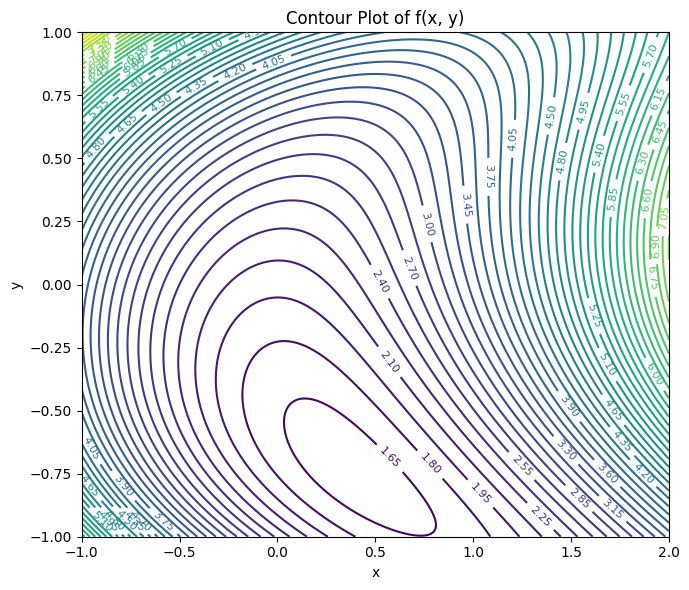

<Figure size 640x480 with 0 Axes>

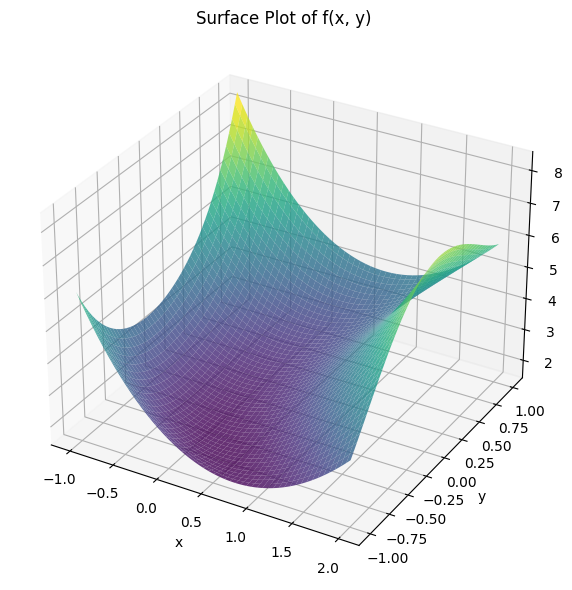

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# ----------------------------
# Function definition
# ----------------------------
def f(x, y):
    return np.exp(-x) + np.exp(y) + (x - y*y)**2 + x


# ----------------------------
# Plot ranges
# ----------------------------
graf_interval_x = (-1, 2)
graf_interval_y = (-1, 1)

X = np.linspace(graf_interval_x[0], graf_interval_x[1], 200)
Y = np.linspace(graf_interval_y[0], graf_interval_y[1], 200)
X_mesh, Y_mesh = np.meshgrid(X, Y)
Z = f(X_mesh, Y_mesh)

# ============================
# 2D Contour Plot
# ============================
plt.figure(figsize=(7, 6))
contours = plt.contour(X_mesh, Y_mesh, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y)')
plt.tight_layout()
plt.show()
plt.savefig("graph_contours.pgf")

# ============================
# 3D Surface Plot
# ============================
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis', alpha=0.8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of f(x, y)')
ax.view_init(elev=30, azim=-60)

plt.tight_layout()
plt.show()
plt.savefig("graph_surface.pgf")


In [6]:
#opravdove minimum
import numpy as np
from scipy.optimize import minimize

# Define the function
def f(vars):
    x, y = vars
    return np.exp(-x) + np.exp(y) + (x - y*y)**2 + x

# Initial guess
x0 = np.array([0.0, 0.0])

# Run the minimization
result = minimize(f, x0, method='BFGS')

# Print results
print("Minimum found at:")
print(f"x = {result.x[0]}")
print(f"y = {result.x[1]}")
print("\nMinimum value of f(x, y):")
print(result.fun)


Minimum found at:
x = 0.3881288178005483
y = -0.7409240511470305

Minimum value of f(x, y):
1.5689964037485726
